# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
#Create our lists to store city data and set the counter
lat = []
lng = []
cname = []
cloudlist = []
country = []
date = []
hmd = []
max_temp = []
windspeed = []
index_counter = 0
set_counter = 1


#generate the required  url
burl = "https://api.openweathermap.org/data/2.5/weather?" 
units = "imperial"

qurl = f"{burl}appid={weather_api_key}&units={units}&q=" 

#For each city in the cities list, use a try and except block shown as below
for x in cities:
    try:
        response = requests.get(qurl + x).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        hmd.append(response["main"]["humidity"])
        cloudlist.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        cname.append(x)
        print(f"City found! {x}")
    except:
        print("404: City NOT found")


City processed: mataura
City processed: ponta do sol
City processed: hithadhoo
City processed: paso de los toros
404: City NOT found
City processed: arica
City processed: rikitea
City processed: olafsvik
City processed: havre-saint-pierre
City processed: bluff
City processed: gasa
City processed: cohoes
City processed: arraial do cabo
City processed: severo-kurilsk
City processed: avarua
City processed: sisimiut
City processed: yellowknife
City processed: sola
City processed: tonantins
404: City NOT found
City processed: maldonado
City processed: cape town
City processed: marseille
City processed: faanui
City processed: jamestown
City processed: nikolskoye
City processed: ribeira grande
City processed: punta arenas
City processed: kapaa
City processed: sao joao da barra
404: City NOT found
City processed: calama
City processed: vaini
City processed: kahului
City processed: busselton
City processed: beringovskiy
City processed: sobolevo
City processed: port elizabeth
City processed: tom

City processed: itaguacu
City processed: bingerville
City processed: manokwari
City processed: jardim
City processed: walvis bay
City processed: wahiawa
City processed: abu dhabi
City processed: bayshore gardens
City processed: lebu
City processed: edd
City processed: pingzhuang
City processed: sucre
404: City NOT found
City processed: williams lake
City processed: quibdo
City processed: xinyu
City processed: oranjestad
City processed: bilibino
City processed: acandi
City processed: san patricio
City processed: bonavista
City processed: kawalu
City processed: angouleme
City processed: ostrovnoy
City processed: verkhnyaya toyma
City processed: iskateley
City processed: hasaki
City processed: maniitsoq
City processed: noumea
City processed: abu kamal
City processed: brae
City processed: cuamba
City processed: paciran
City processed: huarmey
City processed: maunabo
City processed: sao gabriel da cachoeira
City processed: bairiki
City processed: rovaniemi
City processed: turukhansk
City pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Create pandas dataframe using data we retrieved
CityWeather = pd.DataFrame({"City": cname,
                            "Lat": lat,
                           "Lng": lng,
                            "Temperature": max_temp,
                           "Humidity": hmd,
                           "Cloudiness": cloudlist,
                           "Windspeed": windspeed,
                           "Country": country,
                           "Date": date
                          })
CityWeather.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,mataura,-46.1927,168.8643,50.49,85,98,8.14,NZ,1669857681
1,ponta do sol,32.6667,-17.1000,69.71,75,81,8.23,PT,1669857681
2,hithadhoo,-0.6000,73.0833,80.85,69,60,6.76,MV,1669857682
3,paso de los toros,-32.8167,-56.5167,77.36,59,95,13.71,UY,1669857682
4,arica,-18.4750,-70.3042,67.55,77,0,2.30,CL,1669857683


In [17]:
CityWeather.to_csv("../output_data/cities.csv", index = False)
CityWeather.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,mataura,-46.1927,168.8643,50.49,85,98,8.14,NZ,1669857681
1,ponta do sol,32.6667,-17.1000,69.71,75,81,8.23,PT,1669857681
2,hithadhoo,-0.6000,73.0833,80.85,69,60,6.76,MV,1669857682
3,paso de los toros,-32.8167,-56.5167,77.36,59,95,13.71,UY,1669857682
4,arica,-18.4750,-70.3042,67.55,77,0,2.30,CL,1669857683


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
#Isolate the outliers
dry=CityWeather[CityWeather["Humidity"] <100]
dry.count()

City           556
Lat            556
Lng            556
Temperature    556
Humidity       556
Cloudiness     556
Windspeed      556
Country        556
Date           556
dtype: int64

In [20]:
# Make a new DataFrame to drop all outliers

cleancname=dry.rename(mapper=None, index=str, columns=None, axis=None, copy=True, inplace=False, level=None)
display(cleancname)

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Windspeed,Country,Date
0,mataura,-46.1927,168.8643,50.49,85,98,8.14,NZ,1669857681
1,ponta do sol,32.6667,-17.1000,69.71,75,81,8.23,PT,1669857681
2,hithadhoo,-0.6000,73.0833,80.85,69,60,6.76,MV,1669857682
3,paso de los toros,-32.8167,-56.5167,77.36,59,95,13.71,UY,1669857682
4,arica,-18.4750,-70.3042,67.55,77,0,2.30,CL,1669857683
...,...,...,...,...,...,...,...,...,...
559,onega,63.9061,38.1404,16.88,89,100,5.12,RU,1669857902
560,nanortalik,60.1432,-45.2371,27.54,78,65,32.59,GL,1669857902
561,naze,28.3667,129.4833,59.92,75,100,19.62,JP,1669857903
562,phan thiet,10.9333,108.1000,79.38,73,100,5.44,VN,1669857898


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

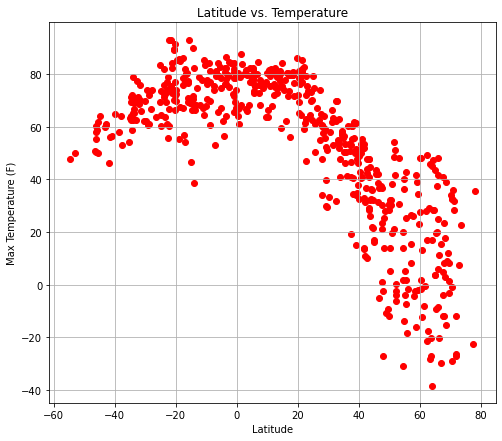

In [25]:

plt.figure(figsize=(8,7))
plt.scatter(cleancname["Lat"],cleancname["Temperature"], color="red", vmin=0, vmax=100)

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("../output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

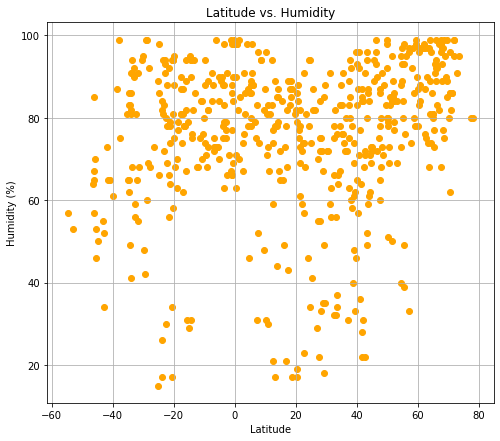

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(cleancname["Lat"],cleancname["Humidity"], color="orange", vmin=0, vmax=100)

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

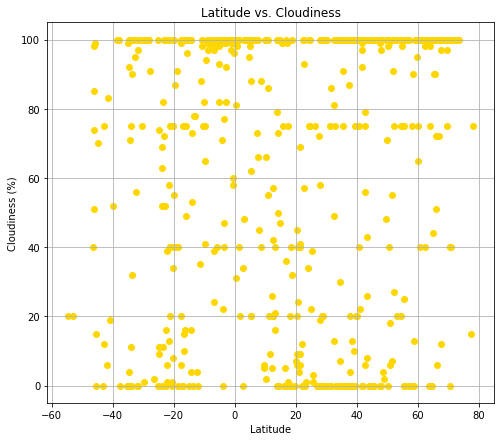

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(cleancname["Lat"],cleancname["Cloudiness"], color="gold", vmin=0, vmax=100)

plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

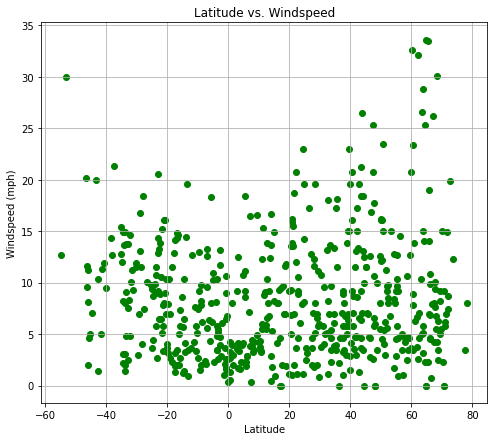

In [28]:
plt.figure(figsize=(8,7))
plt.scatter(cleancname["Lat"],cleancname["Windspeed"], color="green", vmin=0, vmax=100)

plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [32]:
#Store North and SOuth Hemispheres into separate dataframes
north = cleancname[cleancname["Lat"]>=0]
south = cleancname[cleancname["Lat"]<0]


#function "linearRegression"

def linearRegression(x_v,y_v,regEQX,regEQY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_v, y_v)
    regress_values = x_v * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_v,y_v)
    plt.plot(x_v,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQX,regEQY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.8309121425703215
y = -1.22x + 89.58


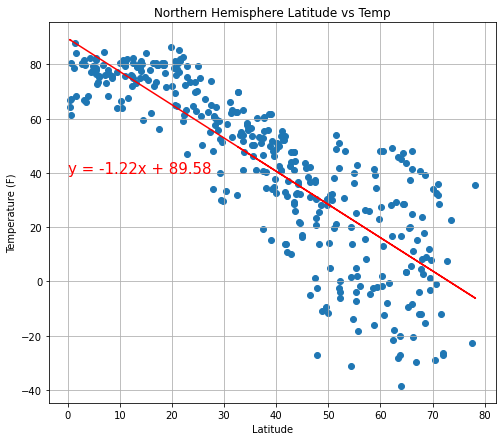

In [34]:
plt.figure(figsize=(8,7))

x_v = north["Lat"]
y_v = north["Temperature"]

regEQX = 0
regEQY = 40

y_label = "Temperature (F)"

plt.title("Northern Hemisphere Latitude vs Temp")

linearRegression(x_v,y_v,regEQX,regEQY,y_label)

plt.savefig('../output_data/Northern Hemisphere Latitude vs Temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.5257840398931161
y = 0.41x + 79.48


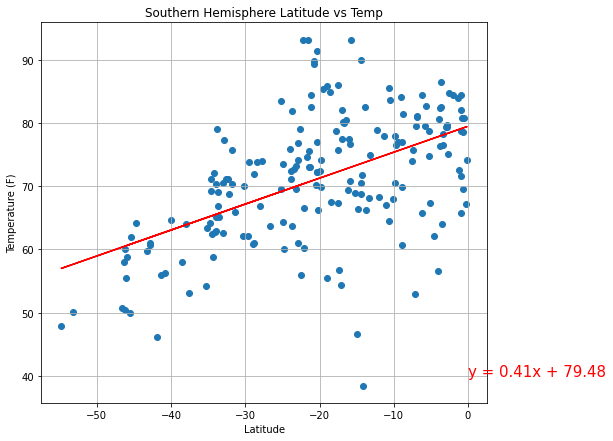

In [35]:
plt.figure(figsize=(8,7))

x_v = south["Lat"]
y_v = south["Temperature"]

regEQX = 0
regEQY = 40

y_label = "Temperature (F)"

plt.title("Southern Hemisphere Latitude vs Temp")

linearRegression(x_v,y_v,regEQX,regEQY,y_label)

plt.savefig('../output_data/Southern Hemisphere Latitude vs Temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.25886227272558654
y = 0.24x + 66.64


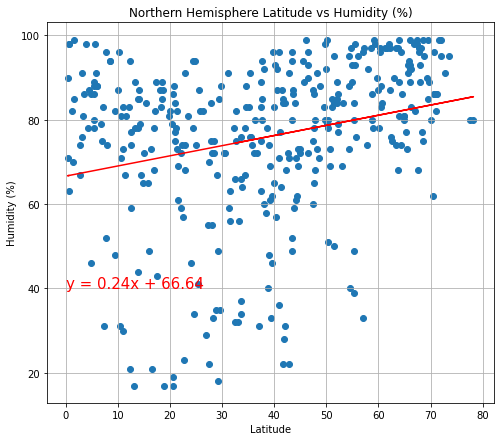

In [36]:
plt.figure(figsize=(8,7))

x_v = north["Lat"]
y_v = north["Humidity"]

regEQX = 0
regEQY = 40

y_label = "Humidity (%)"

plt.title("Northern Hemisphere Latitude vs Humidity (%)")

linearRegression(x_v,y_v,regEQX,regEQY,y_label)

plt.savefig('../output_data/Northern Hemisphere Latitude vs Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.28298677576764564
y = 0.37x + 82.87


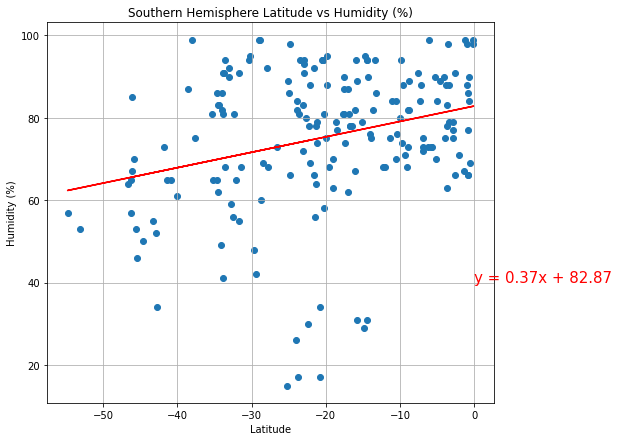

In [37]:
plt.figure(figsize=(8,7))

x_v = south["Lat"]
y_v = south["Humidity"]

regEQX = 0
regEQY = 40

y_label = "Humidity (%)"

plt.title("Southern Hemisphere Latitude vs Humidity (%)")

linearRegression(x_v,y_v,regEQX,regEQY,y_label)

plt.savefig('../output_data/Southern Hemisphere Latitude vs Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.19306554216768423
y = 0.39x + 45.97


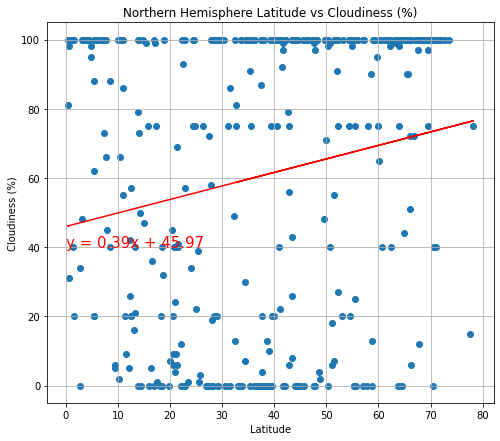

In [38]:
plt.figure(figsize=(8,7))

x_v = north["Lat"]
y_v = north["Cloudiness"]

regEQX = 0
regEQY = 40

y_label = "Cloudiness (%)"

plt.title("Northern Hemisphere Latitude vs Cloudiness (%)")

linearRegression(x_v,y_v,regEQX,regEQY,y_label)

plt.savefig('../output_data/Northern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.2733115983561472
y = 0.81x + 78.84


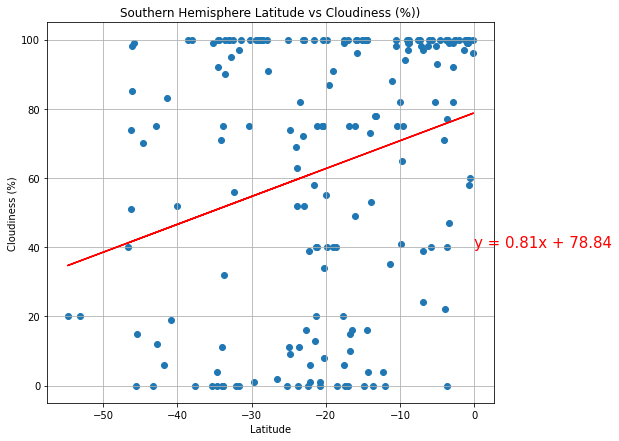

In [40]:
plt.figure(figsize=(8,7))

x_v = south["Lat"]
y_v = south["Cloudiness"]

regEQX = 0
regEQY = 40

y_label = "Cloudiness (%)"

plt.title("Southern Hemisphere Latitude vs Cloudiness (%))")

linearRegression(x_v,y_v,regEQX,regEQY,y_label)

plt.savefig('../output_data/Southern Hemisphere Latitude vs Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.17692547714301624
y = 0.05x + 6.31


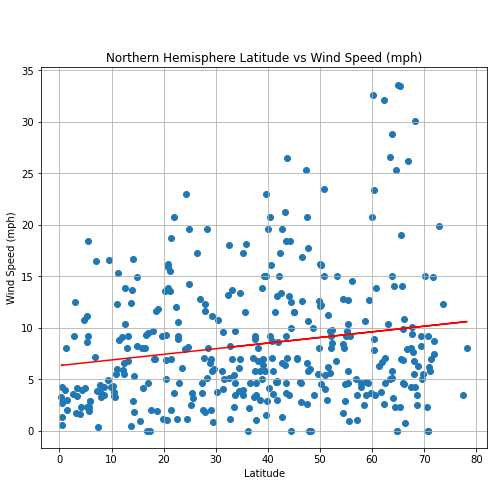

In [41]:
plt.figure(figsize=(8,7))

x_v = north["Lat"]
y_v = north["Windspeed"]

regEQX = 0
regEQY = 40

y_label = "Wind Speed (mph)"

plt.title("Northern Hemisphere Latitude vs Wind Speed (mph)")

linearRegression(x_v,y_v,regEQX,regEQY,y_label)

plt.savefig('../output_data/Northern Hemisphere Latitude vs Wind Speed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.35036018703903893
y = -0.14x + 5.22


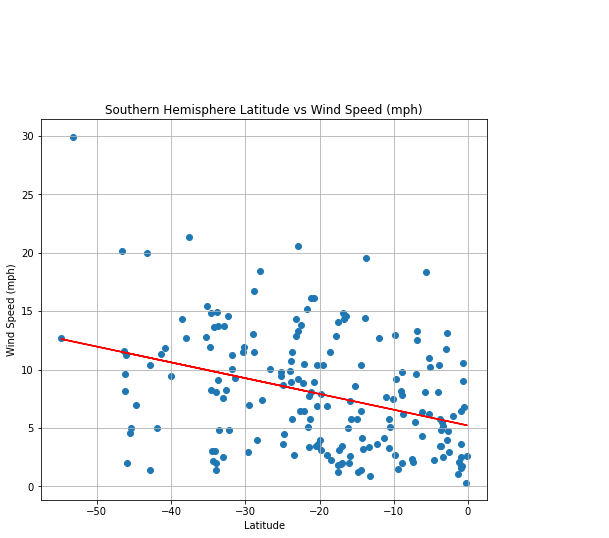

In [42]:
plt.figure(figsize=(8,7))

x_v = south["Lat"]
y_v = south["Windspeed"]

regEQX = 0
regEQY = 40

y_label = "Wind Speed (mph)"

plt.title("Southern Hemisphere Latitude vs Wind Speed (mph)")

linearRegression(x_v,y_v,regEQX,regEQY,y_label)

plt.savefig('../output_data/Southern Hemisphere Latitude vs Wind Speed.png')
plt.show()